<a href="https://colab.research.google.com/github/Stephen-Raj8746/Week1-StudentPerformance-EDA/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/CovidDeaths.csv')
df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,24-02-20,40099462.0,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-20,40099462.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# View column names
df.columns

# Let's keep only the relevant columns
columns_to_keep = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']
df = df[columns_to_keep]

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows where total_cases or total_deaths are missing
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Check for nulls
df.isnull().sum()

,0
date,0
location,0
total_cases,0
new_cases,214
total_deaths,0
population,931
continent,12182


/tmp/ipython-input-11-871331107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cases, x='location', y='total_cases', palette='Reds')


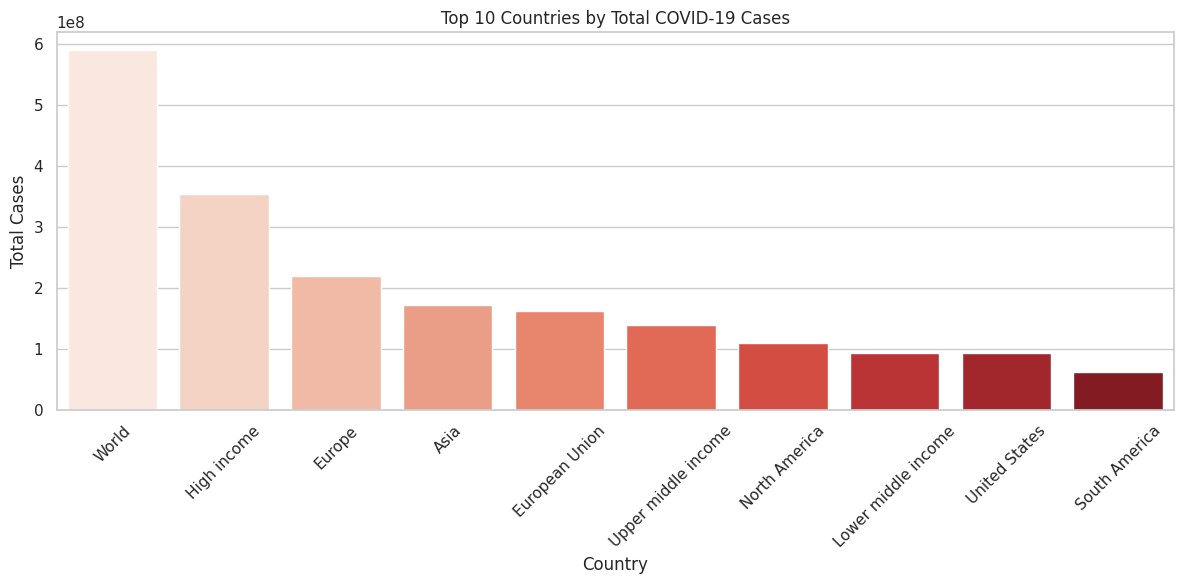

In [11]:
latest_date = df['date'].max()
top_10_cases = df[df['date'] == latest_date].sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_cases, x='location', y='total_cases', palette='Reds')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

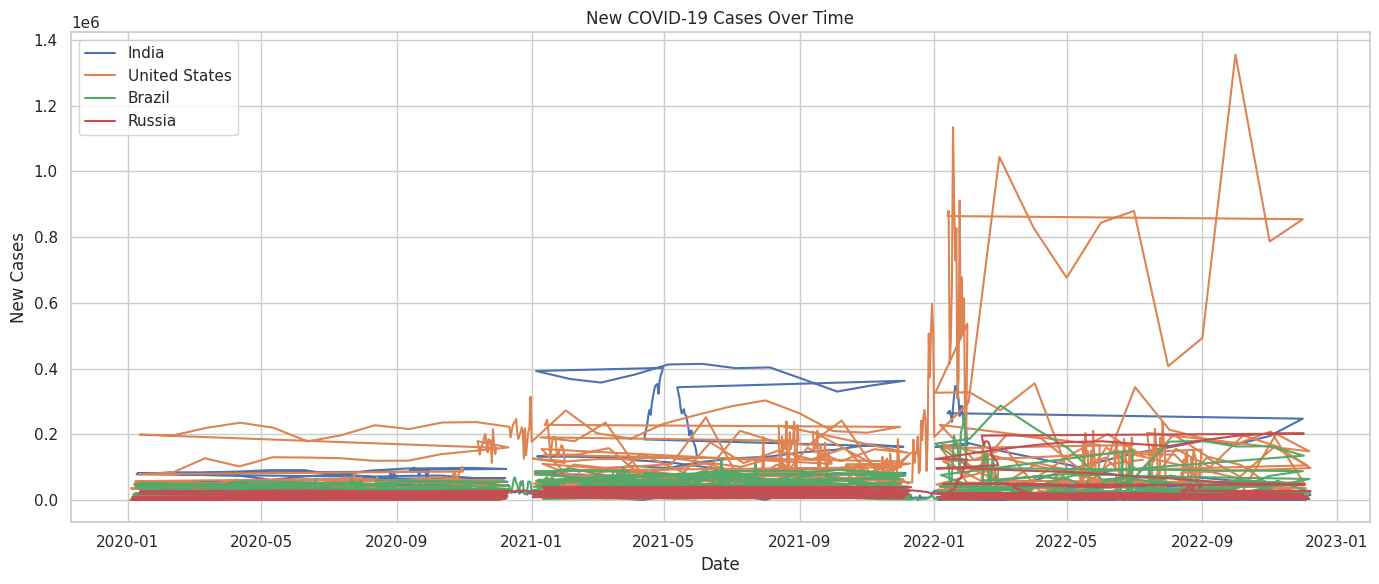

In [12]:
selected_countries = ['India', 'United States', 'Brazil', 'Russia']

plt.figure(figsize=(14,6))
for country in selected_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-1710668143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_deaths, x='location', y='total_deaths', palette='Blues')


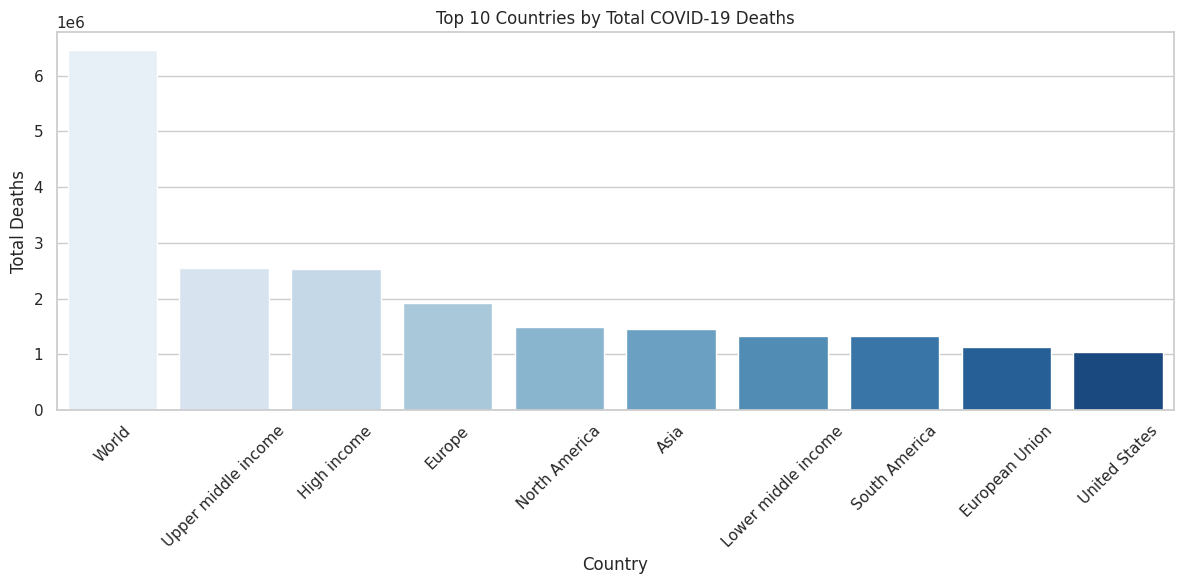

In [15]:
top_10_deaths = df[df['date'] == latest_date].sort_values(by='total_deaths', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_deaths, x='location', y='total_deaths', palette='Blues')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Total COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()

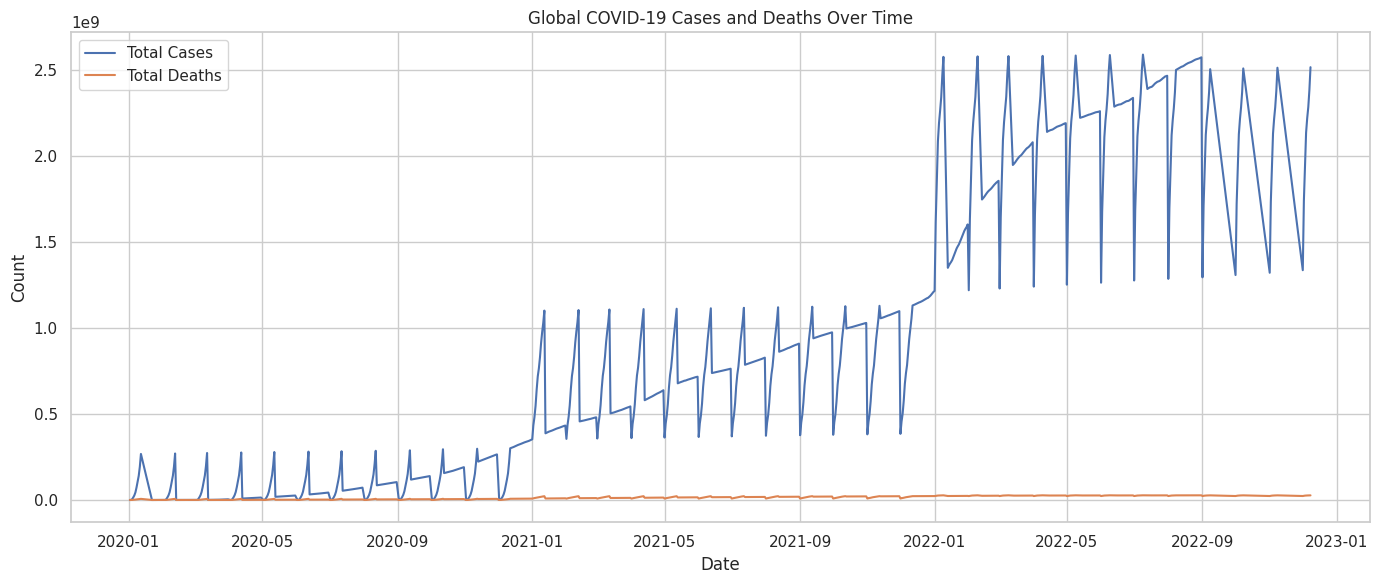

In [16]:
global_trend = df.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(global_trend['date'], global_trend['total_cases'], label='Total Cases')
plt.plot(global_trend['date'], global_trend['total_deaths'], label='Total Deaths')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

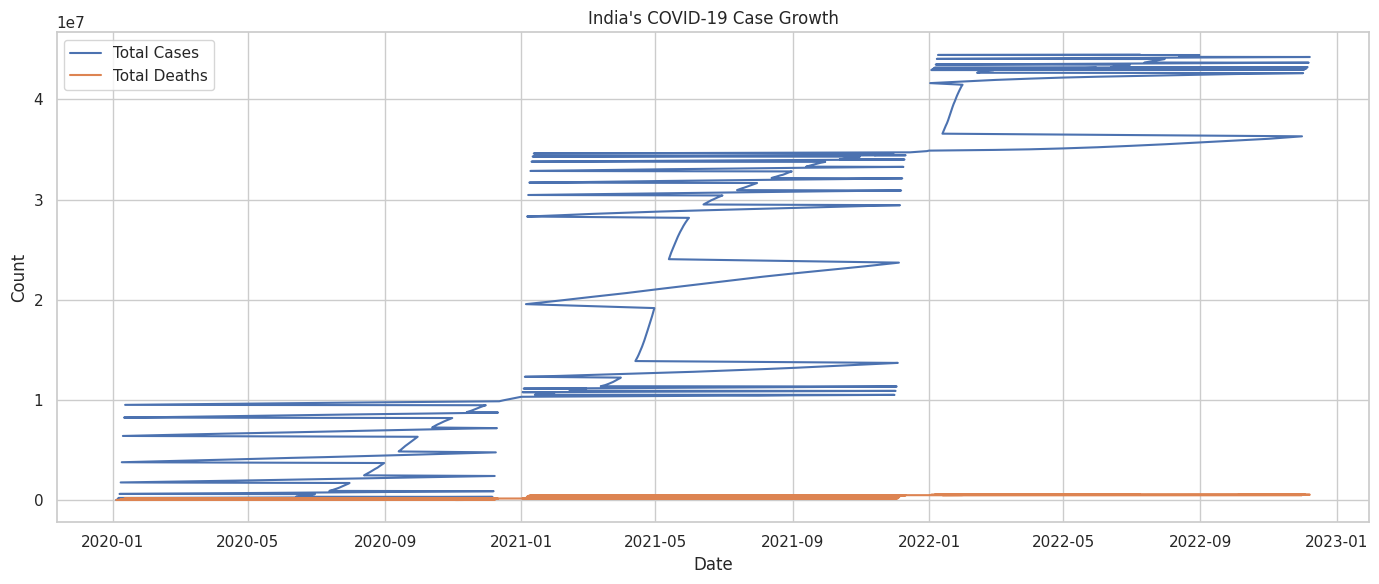

In [17]:
india_data = df[df['location'] == 'India']

plt.figure(figsize=(14,6))
plt.plot(india_data['date'], india_data['total_cases'], label='Total Cases')
plt.plot(india_data['date'], india_data['total_deaths'], label='Total Deaths')
plt.title("India's COVID-19 Case Growth")
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
df['death_rate'] = (df['total_deaths'] / df['total_cases']) * 100
latest death rate for India
india_latest = df[(df['location'] == 'India') & (df['date'] == latest_date)]
india_latest[['location', 'total_cases', 'total_deaths', 'death_rate']]

SyntaxError: invalid syntax (ipython-input-19-3065758413.py, line 2)